In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Ejercicio 1

La tabla siguiente corresponde a la función de probabilidad de una variable aleatoria discreta $X$:

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Valores } x_i \text{ de } X & 1 & 2 & 3 & 4 & 5 \\
\hline
p(x_i) & 0{,}1 & 0{,}1 & 0{,}3 & 0{,}3 & 0{,}2 \\
\hline
\end{array}
$$

**a) Hallar:**

a.1) $p(X \geq 2)$  
a.2) $p(1 \leq X \leq 3)$  
a.3) $p(1 < X \leq 3)$  
a.4) $p(X \leq 1)$  
a.5) $p(X > 2)$  
a.6) $p(X \leq 3)$

**b) Hallar y graficar la función de distribución de $X$.**

In [111]:
# Construimos la tabla de distribución de probabilidad

tabla1 = pd.DataFrame({
    'X': [1, 2, 3, 4, 5],
    'p': [0.1, 0.1, 0.3, 0.3, 0.2]
})

tabla1

,X,p
0,1,0.1
1,2,0.1
2,3,0.3
3,4,0.3
4,5,0.2


In [112]:
# a.1 Calculamos p(X ≥ 2) sumando las probabilidades donde X ≥ 2
p_X_mayor_igual_2 = tabla1.loc[tabla1['X'] >= 2, 'p'].sum()
print(f"p(X ≥ 2) = {p_X_mayor_igual_2:.1f}")

# a.1 Calculamos p(X ≥ 2) usando numpy. Calculamos 1 - p(X < 2)
p_X_mayor_igual_2_numpy = 1 - np.sum(tabla1.loc[(tabla1['X'] < 2), 'p'])
print(f"p(X ≥ 2) usando numpy = {p_X_mayor_igual_2_numpy:.1f}")

p(X ≥ 2) = 0.9
p(X ≥ 2) usando numpy = 0.9


In [113]:
# a.2 Calculamos p(1 ≤ X ≤ 3) sumando las probabilidades donde 1 ≤ X ≤ 3
p_1_menor_igual_X_menor_igual_3 = tabla1.loc[(tabla1['X'] >= 1) & (tabla1['X'] <= 3), 'p'].sum()
print(f"p(1 ≤ X ≤ 3) = {p_1_menor_igual_X_menor_igual_3:.1f}")

# a.3 Calculamos p(1 ≤ X ≤ 3) usando numpy. Calculamos p(X ≤ 3) - p(X < 1)
p_1_menor_igual_X_menor_igual_3_np = np.sum(tabla1.loc[(tabla1['X'] <= 3), 'p']) - np.sum(tabla1.loc[(tabla1['X'] < 1), 'p'])
print(f"p(1 ≤ X ≤ 3) usando numpy = {p_1_menor_igual_X_menor_igual_3_np:.1f}")

p(1 ≤ X ≤ 3) = 0.5
p(1 ≤ X ≤ 3) usando numpy = 0.5


In [114]:
# a.3 Calculamos p(2 ≤ X < 4) sumando las probabilidades donde 2 ≤ X < 4
p_2_menor_igual_X_menor_4 = tabla1.loc[(tabla1['X'] >= 2) & (tabla1['X'] < 4), 'p'].sum()
print(f"p(2 ≤ X < 4) = {p_2_menor_igual_X_menor_4:.1f}")

# a.3 Calculamos p(2 ≤ X < 4) usando numpy. Calculamos p(X < 4) - p(X < 2)
p_2_menor_igual_X_menor_4_np = np.sum(tabla1.loc[(tabla1['X'] < 4), 'p']) - np.sum(tabla1.loc[(tabla1['X'] < 2), 'p'])
print(f"p(2 ≤ X < 4) usando numpy = {p_2_menor_igual_X_menor_4_np:.1f}")

p(2 ≤ X < 4) = 0.4
p(2 ≤ X < 4) usando numpy = 0.4


In [115]:
# a.4 Calculamos p(X ≤ 1) sumando las probabilidades donde X ≤ 1
p_X_menor_igual_1 = tabla1.loc[(tabla1['X'] <= 1), 'p'].sum()
print(f"p(X ≤ 1) = {p_X_menor_igual_1:.1f}")

# a.4 Calculamos p(X ≤ 1) usando numpy
p_X_menor_igual_1_numpy = np.sum(tabla1.loc[(tabla1['X'] <= 1), 'p'])
print(f"p(X ≤ 1) usando numpy = {p_X_menor_igual_1_numpy}")

p(X ≤ 1) = 0.1
p(X ≤ 1) usando numpy = 0.1


In [116]:
# a.5 Calculamos p(X > 2) sumando las probabilidades donde X > 2
p_X_mayor_2 = tabla1.loc[(tabla1['X'] > 2), 'p'].sum()
print(f"p(X > 2) = {p_X_mayor_2}")

# a.5 Calculamos p(X > 2) usando numpy. Calculamos 1 - p(X ≤  2)
p_X_mayor_2_numpy = 1 - np.sum(tabla1.loc[(tabla1['X'] <= 2), 'p'])
print(f"p(X > 2) usando numpy = {p_X_mayor_2_numpy}")

p(X > 2) = 0.8
p(X > 2) usando numpy = 0.8

p(X > 2) usando numpy = 0.8


In [117]:
# a.6 Calculamos p(X ≤ 3) sumando las probabilidades donde X ≤ 3
p_X_menor_igual_3 = tabla1.loc[(tabla1['X'] <= 3), 'p'].sum()
print(f"p(X ≤ 3) = {p_X_menor_igual_3:.1f}")

# a.6 Calculamos p(X ≤ 3) usando numpy
p_X_menor_igual_3_numpy = np.sum(tabla1.loc[tabla1['X'] <= 3, 'p'])
print(f"p(X ≤ 3) usando numpy = {p_X_menor_igual_3_numpy:.1f}")

p(X ≤ 3) = 0.5
p(X ≤ 3) usando numpy = 0.5


In [118]:
# b Hallar y graficar la función de distribución acumulada F(x) = P(X ≤ x)
# Calculamos la función de distribución acumulada F(x)
tabla1['F(x)'] = tabla1['p'].cumsum()
tabla1

,X,p,F(x)
0,1,0.1,0.1
1,2,0.1,0.2
2,3,0.3,0.5
3,4,0.3,0.8
4,5,0.2,1.0


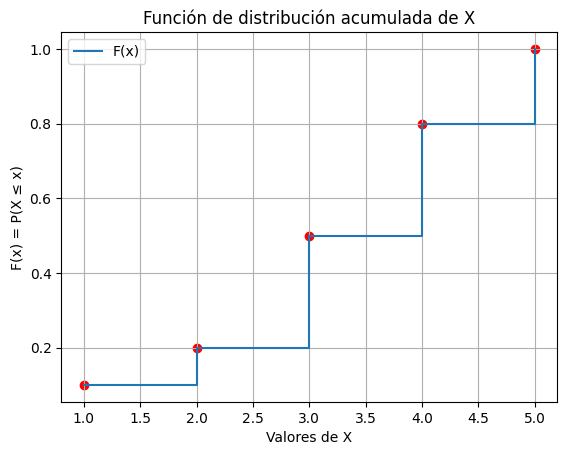

In [119]:
# Graficamos la función de distribución acumulada F(x)
plt.step(tabla1['X'], tabla1['F(x)'], where='post', label='F(x)')
plt.scatter(tabla1['X'], tabla1['F(x)'], color='red')
plt.xlabel('Valores de X')
plt.ylabel('F(x) = P(X ≤ x)')
plt.title('Función de distribución acumulada de X')
plt.grid(True)
plt.legend()
plt.show()

# Ejercicio 2

La siguiente variable aleatoria discreta $X$ está definida por la siguiente función de probabilidad:

$$
\begin{array}{|c|c|c|c|c|}
\hline
\text{Valores } x_i \text{ de } X & -1 & 0 & 1 & 2 \\
\hline
p(x_i) & \dfrac{1}{5} & \dfrac{1}{3} & \dfrac{2}{5} & \dfrac{1}{15} \\
\hline
\end{array}
$$

**a)** ¿Cuál es la probabilidad que $X$ tome el valor $2$?

**b)** Hallar la función de distribución $F(x)$. Calcular $F(-3)$, $F(0{,}5)$, $F(1)$ y $F(5)$.

**c)** Graficar la función de distribución.

In [120]:
# Construimos la tabla de distribución de probabilidad
# Dejamos el valor de p(X=2) como None temporalmente

tabla2 = pd.DataFrame({
    'X': [-1, 0, 1, 2],
    'p': [1/5, 1/3, 2/5, None]
})

round(tabla2, 2)

,X,p
0,-1,0.20
1,0,0.33
2,1,0.40
3,2,NaN


In [121]:
# a p(X = 2) = 1 - (1/5 + 1/3 + 2/5) = a
a = 1 - (1/5 + 1/3 + 2/5)
print(f"p(X = 2) = {a:.2f}")

p(X = 2) = 0.07


In [122]:
# b Calcular la función de distribución acumulada F(x)
print(f"p(X = 2) = {a:.2f}")

# Reemplazamos el valor None con el valor calculado de 'a'
tabla2.loc[tabla2['X'] == 2, 'p'] = a

# Calculamos F(x)
tabla2['F(x)'] = round(tabla2['p'].cumsum(), 2)
tabla2

p(X = 2) = 0.07


,X,p,F(x)
0,-1,0.200000,0.20
1,0,0.333333,0.53
2,1,0.400000,0.93
3,2,0.066667,1.00


In [123]:
# b Definir la función de distribución acumulada F(x) para cualquier valor real x
def funcion_acumulada(x):
    if x < -1:
        return 0
    elif -1 <= x < 0:
        return 1/5
    elif 0 <= x < 1:
        return 1/5 + 1/3
    elif 1 <= x < 2:
        return 1/5 + 1/3 + 2/5
    else:  # x >= 2
        return 1
    
# Hallar valores
print(f"F(-3) = {funcion_acumulada(-3):.2f}")
print(f"F(0.5) = {funcion_acumulada(0.5):.2f}")
print(f"F(1) = {funcion_acumulada(1):.2f}")
print(f"F(5) = {funcion_acumulada(5):.2f}")

F(-3) = 0.00
F(0.5) = 0.53
F(1) = 0.93
F(5) = 1.00


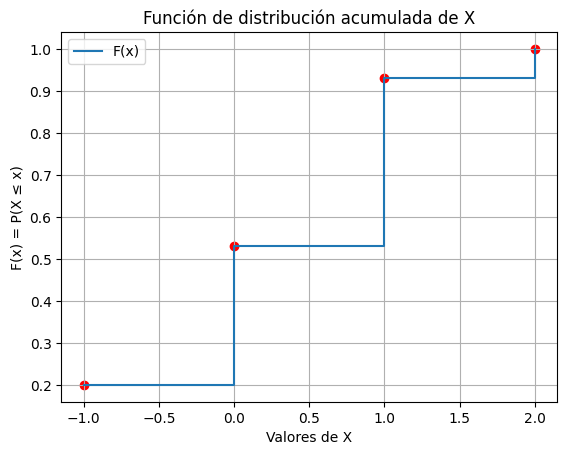

In [124]:
# c Graficamos la función de distribución acumulada F(x)
plt.step(tabla2['X'], tabla2['F(x)'], where='post', label='F(x)')
plt.scatter(tabla2['X'], tabla2['F(x)'], color='red')
plt.xlabel('Valores de X')
plt.ylabel('F(x) = P(X ≤ x)')
plt.title('Función de distribución acumulada de X')
plt.grid(True)
plt.legend()
plt.show()

# Ejercicio 3

Una firma de inversores ofrece a sus clientes bonos municipales que vencen después de diferente número de años. La función de distribución de $T$ = número de años para el vencimiento de un bono seleccionado aleatoriamente está dada por:

$$\
F(t) = 
\begin{cases}
0 & \text{si } t < 1 \\
\frac{1}{4} & \text{si } 1 \leq t < 3 \\
\frac{1}{2} & \text{si } 3 \leq t < 5 \\
\frac{3}{4} & \text{si } 5 \leq t < 7 \\
1 & \text{si } 7 \leq t \\
\end{cases}
$$\

Calcular:

a) $P(T = 5)$

b) $P(T > 3)$

c) $P(1{,}4 \leq T < 6)$

d) $P(2 \leq T < 5 \mid T > 1{,}2)$

In [125]:
# Construimos tabla de distribución de probabilidad

tabla3 = pd.DataFrame({
    'T': [1, 3, 5, 7],
    'p': [1/4, (1/2) - (1/4), (3/4) - (1/2), 1 - (3/4)]
})

# Agregamos F(x)
tabla3['F(t)'] = tabla3['p'].cumsum()

round(tabla3, 2)

,T,p,F(t)
0,1,0.25,0.25
1,3,0.25,0.50
2,5,0.25,0.75
3,7,0.25,1.00


In [126]:
# Construímos función de distribución F(t)
def funcion_acumulada_3(t):
    if t < 1:
        return 0
    elif 1 <= t < 3:
        return 1/4
    elif 3 <= t < 5:
        return 2*1/4
    elif 5 <= t < 7:
        return 3*1/4
    else:  # t >= 7
        return 1


In [127]:
# a) Calculamos la probabilidad de que T = 5 usando la función de distribución acumulada
p_T_igual_5 = funcion_acumulada_3(5) - funcion_acumulada_3(3)
print(f"P(T = 5) = {p_T_igual_5:.2f}")

P(T = 5) = 0.25


In [128]:
# b) Calculamos la probabilidad de que T > 3 usando la función de distribución acumulada
p_T_mayor_3 = 1 - funcion_acumulada_3(3)
print(f"P(T > 3) = {p_T_mayor_3:.2f}")

P(T > 3) = 0.50


In [129]:
# c) Calculamos P(1,4 ≤ T < 6) usando la función de distribución acumulada
# P(1,4 ≤ T < 6) = F(6) - F(1,4)

p_T_entre_1_4_y_6 = funcion_acumulada_3(6) - funcion_acumulada_3(1.4)
print(f"P(1,4 ≤ T < 6) = {p_T_entre_1_4_y_6:.2f}")

P(1,4 ≤ T < 6) = 0.50


In [130]:
# d) Calculamos P(2 ≤ T < 5 | T > 1,2) usando probabilidad condicional
# P(A|B) = P(A ∩ B) / P(B)
# donde A = {2 ≤ T < 5} y B = {T > 1,2}
# A ∩ B = {2 ≤ T < 5} (ya que 2 > 1,2)

# P(2 ≤ T < 5): Como T es discreta y solo toma valores 1, 3, 5, 7
# Los valores entre 2 y 5 (sin incluir 5) son: T = 3
# Por lo tanto: P(2 ≤ T < 5) = P(T = 3) = F(3) - F(1)
p_2_menor_igual_T_menor_5 = funcion_acumulada_3(3) - funcion_acumulada_3(1)
print(f"P(2 ≤ T < 5) = P(T = 3) = {p_2_menor_igual_T_menor_5:.2f}")

# P(T > 1,2): Como 1,2 está entre 1 y 3, usamos F(1,2) = F(1) = 1/4
# P(T > 1,2) = 1 - F(1,2) = 1 - 1/4 = 3/4
p_T_mayor_1_2 = 1 - funcion_acumulada_3(1.2)
print(f"P(T > 1,2) = {p_T_mayor_1_2:.2f}")

# P(2 ≤ T < 5 | T > 1,2) = P(2 ≤ T < 5) / P(T > 1,2)
p_condicional = p_2_menor_igual_T_menor_5 / p_T_mayor_1_2
print(f"\nP(2 ≤ T < 5 | T > 1,2) = {p_condicional:.2f}")

P(2 ≤ T < 5) = P(T = 3) = 0.25
P(T > 1,2) = 0.75

P(2 ≤ T < 5 | T > 1,2) = 0.33


# Ejercicio 4

Calcular E(X) y V (X) para las variables aleatorias de los ejercicios 1 y 2.

## a) Variable del Ejercicio 1

In [131]:
# Ejercicio 4a: Calcular E(X) y V(X) para la variable del Ejercicio 1

# Hacemos una copia de tabla1 para no modificar la original
tabla1_ej4 = tabla1[['X', 'p']].copy()

print("="*60)
print("EJERCICIO 4a: Cálculo de E(X) y V(X) - Variable Ejercicio 1")
print("="*60)

# Paso 1: Calcular E(X) = Σ[x_i · p(x_i)]
tabla1_ej4['x·p'] = tabla1_ej4['X'] * tabla1_ej4['p']
E_X = tabla1_ej4['x·p'].sum()

print("\n📊 Paso 1: Cálculo de E(X)")
print(f"E(X) = Σ[x_i · p(x_i)] = {E_X:.2f}")
print("\nTabla con columna x·p:")
print(tabla1_ej4)

# Paso 2: Calcular E(X²) = Σ[x_i² · p(x_i)]
tabla1_ej4['x²·p'] = (tabla1_ej4['X']**2) * tabla1_ej4['p']
E_X_cuadrado = tabla1_ej4['x²·p'].sum()

print("\n📊 Paso 2: Cálculo de E(X²)")
print(f"E(X²) = Σ[x_i² · p(x_i)] = {E_X_cuadrado:.2f}")

# Paso 3: Calcular V(X) = E(X²) - [E(X)]²
V_X = E_X_cuadrado - E_X**2

print("\n📊 Paso 3: Cálculo de V(X)")
print("V(X) = E(X²) - [E(X)]²")
print(f"V(X) = {E_X_cuadrado:.2f} - ({E_X:.2f})²")
print(f"V(X) = {E_X_cuadrado:.2f} - {E_X**2:.2f}")
print(f"V(X) = {V_X:.4f}")

# Paso 4: Calcular desviación estándar σ(X) = √V(X)
sigma_X = np.sqrt(V_X)
print("\n📊 Paso 4: Cálculo de σ(X)")
print(f"σ(X) = √V(X) = √{V_X:.4f} = {sigma_X:.4f}")

# Método alternativo: V(X) = Σ[(x_i - E(X))² · p(x_i)]
tabla1_ej4['(x-E)²·p'] = ((tabla1_ej4['X'] - E_X)**2) * tabla1_ej4['p']
V_X_alternativo = tabla1_ej4['(x-E)²·p'].sum()

print("\n🔍 Verificación con método alternativo:")
print(f"V(X) = Σ[(x_i - E(X))² · p(x_i)] = {V_X_alternativo:.4f}")

# Mostrar tabla completa con todos los cálculos
print("\n📋 Tabla completa con todos los cálculos:")
print(tabla1_ej4.to_string(index=False))

# Verificación con NumPy
print("\n✅ Verificación con NumPy:")
E_X_numpy = np.average(tabla1['X'], weights=tabla1['p'])
V_X_numpy = np.average((tabla1['X'] - E_X_numpy)**2, weights=tabla1['p'])
sigma_X_numpy = np.sqrt(V_X_numpy)

print(f"E(X) = {E_X_numpy:.2f}")
print(f"V(X) = {V_X_numpy:.4f}")
print(f"σ(X) = {sigma_X_numpy:.4f}")

print(f"\n{'='*60}")
print("RESULTADOS FINALES - Ejercicio 1:")
print(f"{'='*60}")
print(f"Valor Esperado:      E(X) = {E_X:.2f}")
print(f"Varianza:            V(X) = {V_X:.4f}")
print(f"Desviación Estándar: σ(X) = {sigma_X:.4f}")
print(f"{'='*60}\n")

EJERCICIO 4a: Cálculo de E(X) y V(X) - Variable Ejercicio 1

📊 Paso 1: Cálculo de E(X)
E(X) = Σ[x_i · p(x_i)] = 3.40

Tabla con columna x·p:
   X    p  x·p
0  1  0.1  0.1
1  2  0.1  0.2
2  3  0.3  0.9
3  4  0.3  1.2
4  5  0.2  1.0

📊 Paso 2: Cálculo de E(X²)
E(X²) = Σ[x_i² · p(x_i)] = 13.00

📊 Paso 3: Cálculo de V(X)
V(X) = E(X²) - [E(X)]²
V(X) = 13.00 - (3.40)²
V(X) = 13.00 - 11.56
V(X) = 1.4400

📊 Paso 4: Cálculo de σ(X)
σ(X) = √V(X) = √1.4400 = 1.2000

🔍 Verificación con método alternativo:
V(X) = Σ[(x_i - E(X))² · p(x_i)] = 1.4400

📋 Tabla completa con todos los cálculos:
 X   p  x·p  x²·p  (x-E)²·p
 1 0.1  0.1   0.1     0.576
 2 0.1  0.2   0.4     0.196
 3 0.3  0.9   2.7     0.048
 4 0.3  1.2   4.8     0.108
 5 0.2  1.0   5.0     0.512

✅ Verificación con NumPy:
E(X) = 3.40
V(X) = 1.4400
σ(X) = 1.2000

RESULTADOS FINALES - Ejercicio 1:
Valor Esperado:      E(X) = 3.40
Varianza:            V(X) = 1.4400
Desviación Estándar: σ(X) = 1.2000



## b) Variable del Ejercicio 2

In [132]:
# Ejercicio 4b: Calcular E(X) y V(X) para la variable del Ejercicio 2

# Hacemos una copia de tabla2 para no modificar la original
tabla2_ej4 = tabla2[['X', 'p']].copy()

print("="*60)
print("EJERCICIO 4b: Cálculo de E(X) y V(X) - Variable Ejercicio 2")
print("="*60)

# Paso 1: Calcular E(X) = Σ[x_i · p(x_i)]
tabla2_ej4['x·p'] = tabla2_ej4['X'] * tabla2_ej4['p']
E_X2 = tabla2_ej4['x·p'].sum()

print("\n📊 Paso 1: Cálculo de E(X)")
print(f"E(X) = Σ[x_i · p(x_i)] = {E_X2:.4f}")
print("\nTabla con columna x·p:")
print(tabla2_ej4)

# Paso 2: Calcular E(X²) = Σ[x_i² · p(x_i)]
tabla2_ej4['x²·p'] = (tabla2_ej4['X']**2) * tabla2_ej4['p']
E_X2_cuadrado = tabla2_ej4['x²·p'].sum()

print("\n📊 Paso 2: Cálculo de E(X²)")
print(f"E(X²) = Σ[x_i² · p(x_i)] = {E_X2_cuadrado:.4f}")

# Paso 3: Calcular V(X) = E(X²) - [E(X)]²
V_X2 = E_X2_cuadrado - E_X2**2

print("\n📊 Paso 3: Cálculo de V(X)")
print("V(X) = E(X²) - [E(X)]²")
print(f"V(X) = {E_X2_cuadrado:.4f} - ({E_X2:.4f})²")
print(f"V(X) = {E_X2_cuadrado:.4f} - {E_X2**2:.4f}")
print(f"V(X) = {V_X2:.4f}")

# Paso 4: Calcular desviación estándar σ(X) = √V(X)
sigma_X2 = np.sqrt(V_X2)
print("\n📊 Paso 4: Cálculo de σ(X)")
print(f"σ(X) = √V(X) = √{V_X2:.4f} = {sigma_X2:.4f}")

# Método alternativo: V(X) = Σ[(x_i - E(X))² · p(x_i)]
tabla2_ej4['(x-E)²·p'] = ((tabla2_ej4['X'] - E_X2)**2) * tabla2_ej4['p']
V_X2_alternativo = tabla2_ej4['(x-E)²·p'].sum()

print("\n🔍 Verificación con método alternativo:")
print(f"V(X) = Σ[(x_i - E(X))² · p(x_i)] = {V_X2_alternativo:.4f}")

# Mostrar tabla completa con todos los cálculos
print("\n📋 Tabla completa con todos los cálculos:")
print(tabla2_ej4.to_string(index=False))

# Verificación con NumPy
print("\n✅ Verificación con NumPy:")
E_X2_numpy = np.average(tabla2['X'], weights=tabla2['p'])
V_X2_numpy = np.average((tabla2['X'] - E_X2_numpy)**2, weights=tabla2['p'])
sigma_X2_numpy = np.sqrt(V_X2_numpy)

print(f"E(X) = {E_X2_numpy:.4f}")
print(f"V(X) = {V_X2_numpy:.4f}")
print(f"σ(X) = {sigma_X2_numpy:.4f}")

print(f"\n{'='*60}")
print("RESULTADOS FINALES - Ejercicio 2:")
print(f"{'='*60}")
print(f"Valor Esperado:      E(X) = {E_X2:.4f}")
print(f"Varianza:            V(X) = {V_X2:.4f}")
print(f"Desviación Estándar: σ(X) = {sigma_X2:.4f}")
print(f"{'='*60}\n")

EJERCICIO 4b: Cálculo de E(X) y V(X) - Variable Ejercicio 2

📊 Paso 1: Cálculo de E(X)
E(X) = Σ[x_i · p(x_i)] = 0.3333

Tabla con columna x·p:
   X         p       x·p
0 -1  0.200000 -0.200000
1  0  0.333333  0.000000
2  1  0.400000  0.400000
3  2  0.066667  0.133333

📊 Paso 2: Cálculo de E(X²)
E(X²) = Σ[x_i² · p(x_i)] = 0.8667

📊 Paso 3: Cálculo de V(X)
V(X) = E(X²) - [E(X)]²
V(X) = 0.8667 - (0.3333)²
V(X) = 0.8667 - 0.1111
V(X) = 0.7556

📊 Paso 4: Cálculo de σ(X)
σ(X) = √V(X) = √0.7556 = 0.8692

🔍 Verificación con método alternativo:
V(X) = Σ[(x_i - E(X))² · p(x_i)] = 0.7556

📋 Tabla completa con todos los cálculos:
 X        p       x·p     x²·p  (x-E)²·p
-1 0.200000 -0.200000 0.200000  0.355556
 0 0.333333  0.000000 0.000000  0.037037
 1 0.400000  0.400000 0.400000  0.177778
 2 0.066667  0.133333 0.266667  0.185185

✅ Verificación con NumPy:
E(X) = 0.3333
V(X) = 0.7556
σ(X) = 0.8692

RESULTADOS FINALES - Ejercicio 2:
Valor Esperado:      E(X) = 0.3333
Varianza:            V(X) = 0.

# Ejercicio 5

Sea $X$ una variable aleatoria que toma los valores $0$, $1$ y $2$ y $E(X^2) = 2{,}3$. Sabiendo que $P(x=1) = 0{,}3$, encontrar los parámetros de una nueva variable definida como el triple de la original reducida en una unidad.

### Paso 1: Encontrar la distribución completa de X

In [133]:
# Datos del ejercicio:
# X toma valores: {0, 1, 2}
# E(X²) = 2.3
# P(X = 1) = 0.3

# Sabemos que: P(X=0) + P(X=1) + P(X=2) = 1
# Por lo tanto: P(X=0) + 0.3 + P(X=2) = 1
# Entonces: P(X=0) + P(X=2) = 0.7

# Usando E(X²) = 0²·P(X=0) + 1²·P(X=1) + 2²·P(X=2) = 2.3
# 0·P(X=0) + 1·0.3 + 4·P(X=2) = 2.3
# 0.3 + 4·P(X=2) = 2.3
# P(X=2) = (2.3 - 0.3) / 4 = 0.5

p_X_2 = (2.3 - 0.3) / 4
print(f"P(X = 2) = {p_X_2}")

# Por lo tanto:
p_X_0 = 0.7 - p_X_2
print(f"P(X = 0) = {p_X_0}")

# Creamos la tabla de distribución de X
tabla_X = pd.DataFrame({
    'X': [0, 1, 2],
    'p(X)': [p_X_0, 0.3, p_X_2]
})

print("\n📊 Distribución de probabilidad de X:")
print(tabla_X)

P(X = 2) = 0.49999999999999994
P(X = 0) = 0.2

📊 Distribución de probabilidad de X:
   X  p(X)
0  0   0.2
1  1   0.3
2  2   0.5


### Paso 2: Calcular E(X) y V(X)

In [134]:
# Calculamos E(X) = Σ[x · p(x)]
tabla_X['x·p'] = tabla_X['X'] * tabla_X['p(X)']
E_X_ej5 = tabla_X['x·p'].sum()

print(f"E(X) = {E_X_ej5}")

# Ya sabemos E(X²) = 2.3 (dato del ejercicio)
E_X2_ej5 = 2.3

# Calculamos V(X) = E(X²) - [E(X)]²
V_X_ej5 = E_X2_ej5 - E_X_ej5**2

print(f"E(X²) = {E_X2_ej5}")
print(f"V(X) = E(X²) - [E(X)]² = {E_X2_ej5} - {E_X_ej5}² = {E_X2_ej5} - {E_X_ej5**2:.2f} = {V_X_ej5:.2f}")

print(f"\n{'='*50}")
print("PARÁMETROS DE X:")
print(f"{'='*50}")
print(f"E(X) = {E_X_ej5:.2f}")
print(f"V(X) = {V_X_ej5:.2f}")
print(f"{'='*50}")

E(X) = 1.2999999999999998
E(X²) = 2.3
V(X) = E(X²) - [E(X)]² = 2.3 - 1.2999999999999998² = 2.3 - 1.69 = 0.61

PARÁMETROS DE X:
E(X) = 1.30
V(X) = 0.61


### Paso 3: Método 1 - Cálculo directo con tabla de Y

In [135]:
# Y = 3X - 1
# Cuando X = 0 → Y = 3(0) - 1 = -1
# Cuando X = 1 → Y = 3(1) - 1 = 2
# Cuando X = 2 → Y = 3(2) - 1 = 5

# Las probabilidades se mantienen
tabla_Y = pd.DataFrame({
    'Y': [3*0 - 1, 3*1 - 1, 3*2 - 1],
    'p(Y)': [p_X_0, 0.3, p_X_2]
})

print("📊 Distribución de probabilidad de Y = 3X - 1:")
print(tabla_Y)

# Calculamos E(Y) = Σ[y · p(y)]
tabla_Y['y·p'] = tabla_Y['Y'] * tabla_Y['p(Y)']
E_Y_directo = tabla_Y['y·p'].sum()

# Calculamos E(Y²) = Σ[y² · p(y)]
tabla_Y['y²·p'] = (tabla_Y['Y']**2) * tabla_Y['p(Y)']
E_Y2_directo = tabla_Y['y²·p'].sum()

# Calculamos V(Y) = E(Y²) - [E(Y)]²
V_Y_directo = E_Y2_directo - E_Y_directo**2

print("\n📐 Método 1 - Cálculo directo:")
print(f"E(Y) = {E_Y_directo:.2f}")
print(f"E(Y²) = {E_Y2_directo:.2f}")
print(f"V(Y) = {E_Y2_directo:.2f} - {E_Y_directo:.2f}² = {E_Y2_directo:.2f} - {E_Y_directo**2:.2f} = {V_Y_directo:.2f}")

📊 Distribución de probabilidad de Y = 3X - 1:
   Y  p(Y)
0 -1   0.2
1  2   0.3
2  5   0.5

📐 Método 1 - Cálculo directo:
E(Y) = 2.90
E(Y²) = 13.90
V(Y) = 13.90 - 2.90² = 13.90 - 8.41 = 5.49


### Paso 4: Método 2 - Usando propiedades de transformación lineal

In [136]:
# Para Y = aX + b, donde a = 3 y b = -1:
# E(Y) = a·E(X) + b = 3·E(X) - 1
# V(Y) = a²·V(X) = 3²·V(X) = 9·V(X)

print("📐 Método 2 - Transformación lineal Y = 3X - 1:")
print("\nPropiedades de transformación lineal (Y = aX + b):")
print("• E(Y) = a·E(X) + b")
print("• V(Y) = a²·V(X)")
print()

a = 3
b = -1

E_Y_transformacion = a * E_X_ej5 + b
V_Y_transformacion = (a**2) * V_X_ej5

print(f"Con a = {a} y b = {b}:")
print(f"E(Y) = {a}·E(X) + ({b}) = {a}·{E_X_ej5:.2f} + ({b}) = {E_Y_transformacion:.2f}")
print(f"V(Y) = {a}²·V(X) = {a**2}·{V_X_ej5:.2f} = {V_Y_transformacion:.2f}")

📐 Método 2 - Transformación lineal Y = 3X - 1:

Propiedades de transformación lineal (Y = aX + b):
• E(Y) = a·E(X) + b
• V(Y) = a²·V(X)

Con a = 3 y b = -1:
E(Y) = 3·E(X) + (-1) = 3·1.30 + (-1) = 2.90
V(Y) = 3²·V(X) = 9·0.61 = 5.49


### Resultados finales

In [137]:
print("="*60)
print("RESULTADOS FINALES - Ejercicio 5")
print("="*60)
print("\nVariable original X:")
print(f"  E(X) = {E_X_ej5:.2f}")
print(f"  V(X) = {V_X_ej5:.2f}")
print()
print("Variable transformada Y = 3X - 1:")
print(f"  E(Y) = {E_Y_directo:.2f} (método directo) = {E_Y_transformacion:.2f} (transformación)")
print(f"  V(Y) = {V_Y_directo:.2f} (método directo) = {V_Y_transformacion:.2f} (transformación)")
print()
print("✅ Ambos métodos dan el mismo resultado")
print("="*60)

RESULTADOS FINALES - Ejercicio 5

Variable original X:
  E(X) = 1.30
  V(X) = 0.61

Variable transformada Y = 3X - 1:
  E(Y) = 2.90 (método directo) = 2.90 (transformación)
  V(Y) = 5.49 (método directo) = 5.49 (transformación)

✅ Ambos métodos dan el mismo resultado


# Ejercicio 6

Una variable aleatoria discreta $X$ está definida por la siguiente función de probabilidad. Sabiendo que $E(X) = 3$, completar la tabla y calcular $V(X)$.

$$
\begin{array}{|c|c|c|c|c|}
\hline
\text{Valores } x_i \text{ de } X & 0 & 3 & 6 & 9 \\
\hline
p(x_i) & & & 0{,}1 & 0{,}2 \\
\hline
\end{array}
$$

### Paso 1: Completar la tabla usando E(X) = 3

In [138]:
# Datos del ejercicio:
# X toma valores: {0, 3, 6, 9}
# P(X = 6) = 0.1
# P(X = 9) = 0.2
# E(X) = 3

# Sea p0 = P(X=0) y p3 = P(X=3)
# Tenemos dos ecuaciones:

# Ecuación 1: Suma de probabilidades = 1
# p0 + p3 + 0.1 + 0.2 = 1
# p0 + p3 = 0.7

# Ecuación 2: E(X) = Σ[x · p(x)] = 3
# 0·p0 + 3·p3 + 6·0.1 + 9·0.2 = 3
# 3·p3 + 0.6 + 1.8 = 3
# 3·p3 + 2.4 = 3
# 3·p3 = 0.6
# p3 = 0.2

p3 = (3 - 0.6 - 1.8) / 3
print(f"P(X = 3) = {p3:.2f}")

# De la ecuación 1:
# p0 = 0.7 - p3
p0 = 0.7 - p3
print(f"P(X = 0) = {p0:.2f}")

# Verificación: suma de probabilidades
suma_prob = p0 + p3 + 0.1 + 0.2
print(f"\nVerificación: {p0:.2f} + {p3:.2f} + 0.1 + 0.2 = {suma_prob:.2f} ✓")

# Verificación: E(X)
E_X_verificacion = 0*p0 + 3*p3 + 6*0.1 + 9*0.2
print(f"Verificación: E(X) = {E_X_verificacion:.2f} ✓")

# Tabla completa
tabla_X_ej6 = pd.DataFrame({
    'X': [0, 3, 6, 9],
    'p(X)': [p0, p3, 0.1, 0.2]
})

print("\n📊 Tabla de distribución completa:")
print(tabla_X_ej6)

P(X = 3) = 0.20
P(X = 0) = 0.50

Verificación: 0.50 + 0.20 + 0.1 + 0.2 = 1.00 ✓
Verificación: E(X) = 3.00 ✓

📊 Tabla de distribución completa:
   X  p(X)
0  0   0.5
1  3   0.2
2  6   0.1
3  9   0.2


### Paso 2: Calcular V(X)

In [139]:
# Para calcular V(X) = E(X²) - [E(X)]²
# Primero calculamos E(X²)

tabla_X_ej6['x²·p'] = (tabla_X_ej6['X']**2) * tabla_X_ej6['p(X)']
E_X2_ej6 = tabla_X_ej6['x²·p'].sum()

print("E(X²) = Σ[x² · p(x)]")
print(f"E(X²) = 0²·{p0:.2f} + 3²·{p3:.2f} + 6²·0.1 + 9²·0.2")
print(f"E(X²) = 0 + {9*p3:.2f} + {36*0.1:.2f} + {81*0.2:.2f}")
print(f"E(X²) = {E_X2_ej6:.2f}")

# Calculamos V(X)
E_X_ej6 = 3  # Dato del ejercicio
V_X_ej6 = E_X2_ej6 - E_X_ej6**2

print("\nV(X) = E(X²) - [E(X)]²")
print(f"V(X) = {E_X2_ej6:.2f} - {E_X_ej6}²")
print(f"V(X) = {E_X2_ej6:.2f} - {E_X_ej6**2:.2f}")
print(f"V(X) = {V_X_ej6:.2f}")

# Desviación estándar
sigma_X_ej6 = np.sqrt(V_X_ej6)
print(f"\nσ(X) = √V(X) = √{V_X_ej6:.2f} = {sigma_X_ej6:.2f}")

print("\n" + "="*60)
print("RESULTADOS FINALES - Ejercicio 6")
print("="*60)
print("Tabla completa:")
print(tabla_X_ej6)
print()
print(f"E(X) = {E_X_ej6:.2f}")
print(f"V(X) = {V_X_ej6:.2f}")
print(f"σ(X) = {sigma_X_ej6:.2f}")
print("="*60)

E(X²) = Σ[x² · p(x)]
E(X²) = 0²·0.50 + 3²·0.20 + 6²·0.1 + 9²·0.2
E(X²) = 0 + 1.80 + 3.60 + 16.20
E(X²) = 21.60

V(X) = E(X²) - [E(X)]²
V(X) = 21.60 - 3²
V(X) = 21.60 - 9.00
V(X) = 12.60

σ(X) = √V(X) = √12.60 = 3.55

RESULTADOS FINALES - Ejercicio 6
Tabla completa:
   X  p(X)  x²·p
0  0   0.5   0.0
1  3   0.2   1.8
2  6   0.1   3.6
3  9   0.2  16.2

E(X) = 3.00
V(X) = 12.60
σ(X) = 3.55
   X  p(X)  x²·p
0  0   0.5   0.0
1  3   0.2   1.8
2  6   0.1   3.6
3  9   0.2  16.2

E(X) = 3.00
V(X) = 12.60
σ(X) = 3.55


# Ejercicio 7

Sean $X$ e $Y$ dos variables aleatorias independientes. Se sabe que $E(X)=2$, $E(Y)=4{,}1$, $V(X)=0{,}4$ y $V(Y)=3$. Calcule:

a) $E(2X+3Y)$

b) $E(5X-1)$

c) $V(3X)$

d) $E(X^2)$

e) $V(2Y-1)$

f) $V(5X-Y)$

### Solución usando propiedades de transformación lineal

In [140]:
# Datos del ejercicio
E_X = 2
E_Y = 4.1
V_X = 0.4
V_Y = 3

print("="*60)
print("EJERCICIO 7 - Propiedades de transformación lineal")
print("="*60)
print("\nDatos:")
print(f"E(X) = {E_X:.2f}")
print(f"E(Y) = {E_Y:.2f}")
print(f"V(X) = {V_X:.2f}")
print(f"V(Y) = {V_Y:.2f}")
print("X e Y son independientes")
print("="*60)

EJERCICIO 7 - Propiedades de transformación lineal

Datos:
E(X) = 2.00
E(Y) = 4.10
V(X) = 0.40
V(Y) = 3.00
X e Y son independientes


In [141]:
# a) E(2X + 3Y)
# Propiedad: E(aX + bY) = a·E(X) + b·E(Y)

a_resultado = 2*E_X + 3*E_Y

print("\n📐 a) E(2X + 3Y)")
print("Propiedad: E(aX + bY) = a·E(X) + b·E(Y)")
print("E(2X + 3Y) = 2·E(X) + 3·E(Y)")
print(f"E(2X + 3Y) = 2·{E_X:.2f} + 3·{E_Y:.2f}")
print(f"E(2X + 3Y) = {2*E_X:.2f} + {3*E_Y:.2f}")
print(f"E(2X + 3Y) = {a_resultado:.2f}")


📐 a) E(2X + 3Y)
Propiedad: E(aX + bY) = a·E(X) + b·E(Y)
E(2X + 3Y) = 2·E(X) + 3·E(Y)
E(2X + 3Y) = 2·2.00 + 3·4.10
E(2X + 3Y) = 4.00 + 12.30
E(2X + 3Y) = 16.30


In [142]:
# b) E(5X - 1)
# Propiedad: E(aX + b) = a·E(X) + b

b_resultado = 5*E_X - 1

print("\n📐 b) E(5X - 1)")
print("Propiedad: E(aX + b) = a·E(X) + b")
print("E(5X - 1) = 5·E(X) - 1")
print(f"E(5X - 1) = 5·{E_X:.2f} - 1")
print(f"E(5X - 1) = {5*E_X:.2f} - 1")
print(f"E(5X - 1) = {b_resultado:.2f}")


📐 b) E(5X - 1)
Propiedad: E(aX + b) = a·E(X) + b
E(5X - 1) = 5·E(X) - 1
E(5X - 1) = 5·2.00 - 1
E(5X - 1) = 10.00 - 1
E(5X - 1) = 9.00


In [143]:
# c) V(3X)
# Propiedad: V(aX) = a²·V(X)

c_resultado = (3**2) * V_X

print("\n📐 c) V(3X)")
print("Propiedad: V(aX) = a²·V(X)")
print("V(3X) = 3²·V(X)")
print(f"V(3X) = 9·{V_X:.2f}")
print(f"V(3X) = {c_resultado:.2f}")


📐 c) V(3X)
Propiedad: V(aX) = a²·V(X)
V(3X) = 3²·V(X)
V(3X) = 9·0.40
V(3X) = 3.60


In [144]:
# d) E(X²)
# Propiedad: V(X) = E(X²) - [E(X)]²
# Despejando: E(X²) = V(X) + [E(X)]²

d_resultado = V_X + E_X**2

print("\n📐 d) E(X²)")
print("De la definición de varianza: V(X) = E(X²) - [E(X)]²")
print("Despejando: E(X²) = V(X) + [E(X)]²")
print("E(X²) = V(X) + [E(X)]²")
print(f"E(X²) = {V_X:.2f} + {E_X:.2f}²")
print(f"E(X²) = {V_X:.2f} + {E_X**2:.2f}")
print(f"E(X²) = {d_resultado:.2f}")


📐 d) E(X²)
De la definición de varianza: V(X) = E(X²) - [E(X)]²
Despejando: E(X²) = V(X) + [E(X)]²
E(X²) = V(X) + [E(X)]²
E(X²) = 0.40 + 2.00²
E(X²) = 0.40 + 4.00
E(X²) = 4.40


In [145]:
# e) V(2Y - 1)
# Propiedad: V(aY + b) = a²·V(Y)  (la constante no afecta la varianza)

e_resultado = (2**2) * V_Y

print("\n📐 e) V(2Y - 1)")
print("Propiedad: V(aY + b) = a²·V(Y)")
print("(La constante -1 no afecta la varianza)")
print("V(2Y - 1) = 2²·V(Y)")
print(f"V(2Y - 1) = 4·{V_Y:.2f}")
print(f"V(2Y - 1) = {e_resultado:.2f}")


📐 e) V(2Y - 1)
Propiedad: V(aY + b) = a²·V(Y)
(La constante -1 no afecta la varianza)
V(2Y - 1) = 2²·V(Y)
V(2Y - 1) = 4·3.00
V(2Y - 1) = 12.00


In [146]:
# f) V(5X - Y)
# Para variables INDEPENDIENTES: V(aX + bY) = a²·V(X) + b²·V(Y)
# En este caso: V(5X - Y) = V(5X + (-1)Y) = 5²·V(X) + (-1)²·V(Y)

f_resultado = (5**2) * V_X + ((-1)**2) * V_Y

print("\n📐 f) V(5X - Y)")
print("Como X e Y son INDEPENDIENTES:")
print("Propiedad: V(aX + bY) = a²·V(X) + b²·V(Y)")
print("V(5X - Y) = V(5X + (-1)Y)")
print("V(5X - Y) = 5²·V(X) + (-1)²·V(Y)")
print(f"V(5X - Y) = 25·{V_X:.2f} + 1·{V_Y:.2f}")
print(f"V(5X - Y) = {25*V_X:.2f} + {V_Y:.2f}")
print(f"V(5X - Y) = {f_resultado:.2f}")


📐 f) V(5X - Y)
Como X e Y son INDEPENDIENTES:
Propiedad: V(aX + bY) = a²·V(X) + b²·V(Y)
V(5X - Y) = V(5X + (-1)Y)
V(5X - Y) = 5²·V(X) + (-1)²·V(Y)
V(5X - Y) = 25·0.40 + 1·3.00
V(5X - Y) = 10.00 + 3.00
V(5X - Y) = 13.00


In [147]:
print("\n" + "="*60)
print("RESUMEN DE RESULTADOS - Ejercicio 7")
print("="*60)
print(f"a) E(2X + 3Y) = {a_resultado:.2f}")
print(f"b) E(5X - 1) = {b_resultado:.2f}")
print(f"c) V(3X) = {c_resultado:.2f}")
print(f"d) E(X²) = {d_resultado:.2f}")
print(f"e) V(2Y - 1) = {e_resultado:.2f}")
print(f"f) V(5X - Y) = {f_resultado:.2f}")
print("="*60)


RESUMEN DE RESULTADOS - Ejercicio 7
a) E(2X + 3Y) = 16.30
b) E(5X - 1) = 9.00
c) V(3X) = 3.60
d) E(X²) = 4.40
e) V(2Y - 1) = 12.00
f) V(5X - Y) = 13.00
